In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [65]:
df = pd.read_csv("data.csv")

In [90]:
test_df = df[df.result_dt > "2022-09-23 08:50:58.445067"].copy()
train_df = df[df.result_dt <= "2022-09-23 08:50:58.445067"].copy()

In [91]:
model = RandomForestRegressor()

In [92]:
target = "goal_diff"
features = [
    'team1_defender_defensive_rating_before_game',
    'team1_attacker_offensive_rating_before_game',
    'team2_defender_defensive_rating_before_game',
    'team2_attacker_offensive_rating_before_game'
]

In [93]:
model.fit(train_df[features], train_df[target])

RandomForestRegressor()

In [95]:
test_df["prediction"] = model.predict(test_df[features])

In [96]:
test_df["residuals"]  = test_df[target] - test_df["prediction"]

In [99]:
test_df["residuals"].abs().mean()

4.086666666666667

<AxesSubplot:>

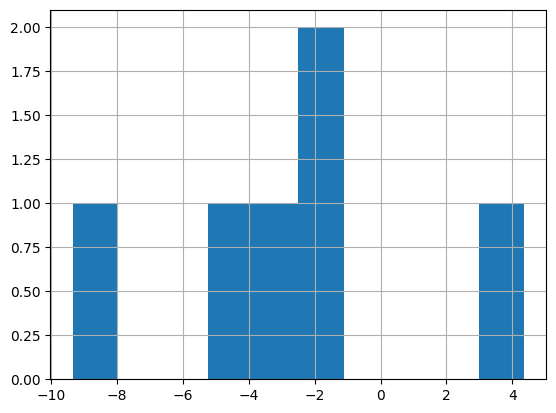

In [100]:
test_df["residuals"].hist()